In [70]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

from dataset import *

# This is a hack to be able to import modules in parent directory
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [71]:
datasets = {
            0: deepmatcher_structured_amazon_google,
            1: deepmatcher_structured_dblp_acm,
            2: deepmatcher_structured_dblp_google_scholar,
            3: deepmatcher_structured_itunes_amazon,
            4: deepmatcher_structured_walmart_amazon,
            5: deepmatcher_textual_abt_buy,
}

In [72]:
def save_plots(models=['distillbert-1402'], specific=-1, x='labeled_instances', y='test_f1', max_index=15, plots=['exp1', 'exp3', 'random'], **kwargs):
    """
    Main function for saving plots based on test results
    params:
    specific: specify dataset by name,
    x: which values to use on x-axis,
    y: which values to use on y-axis,
    max_index: maximum index of rows to use,
    plots: list of predefined experiments to be included
    """
    if specific == -1:
        for key in datasets:
            plot_results(models, key, x, y, max_index, plots)
    
    else:
        plot_results(models, specific, x, y, max_index, plots)

def plot_results(models, key, x='labeled_instances', y='test_f1', max_index=15, plots=['exp1', 'exp3', 'random']):
    """
    params: same as "save_plots"
    """
    d = datasets[key]()
    scores = {
    }
    predictions = {
    }
    for model in models:
        for filename in glob(f'{model}/out/{d.name}/*.csv'):
            if 'exp1' and 'predictions' in filename:
                p = pd.read_csv(filename, header=0)
                predictions[f'{model}_datasetdl_predictions'] = d
            elif 'exp1' in filename and not 'predictions' in filename:
                s = pd.read_csv(filename, usecols=[y, 'labeled_instances'], header=0)
                scores[f'{model}_exp1'] = s
            elif 'exp3' and 'random' in filename:
                s = pd.read_csv(filename, usecols=[y, 'labeled_instances'], header=0)
                max_f1 = s['test_f1'].iloc[[-1]].to_numpy()[-1]
                s.drop(s.tail(1).index,inplace=True)
                scores[f'{model}_random'] = s
            elif 'exp3' and 'al' in filename:
                s = pd.read_csv(filename, usecols=[y, 'labeled_instances'], header=0)
                scores[f'{model}_exp3'] = s
    
    collection = {}
    for key in scores:
        for plot in plots:
            if plot in key:
                collection[key] = scores[key]
        
    make_plot(collection, x, y, d, max_f1, models, plots)
    
def make_plot(scores, x, y, d, max_f1, models, plots):
    plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k') # set size of plot
    
    titles = []
    for key in scores:
        if 'random' in key:
            plt.axhline(y=max_f1, color='r')
            titles.append(f'{key}_all')
        plt.plot(scores[key][x], scores[key][y])
        titles.append(key)

    #plt.xticks(scores['sv'][x])  # set values of points on x axis
    plt.margins(0.01) # set margins to 0.01
    plt.legend(titles, loc=4) # add titles of plots, 4 = lower right, 2 = upper left
    title = d.name.split('/')[-1]
    plt.title(title)
    plt.xlabel('x');
    
    try:
        path = os.path.join('graps', f'{"_".join(models)}', f'{"_".join(plots)}')
        os.makedirs(path)
    except OSError as e:
        print(e.strerror)
    
    plt.savefig(f'{path}/{"_".join(models)}_{"_".join(plots)}_{y}_{title}.pdf', format='pdf', bbox_inches='tight')

File exists
File exists
File exists
File exists
File exists
File exists


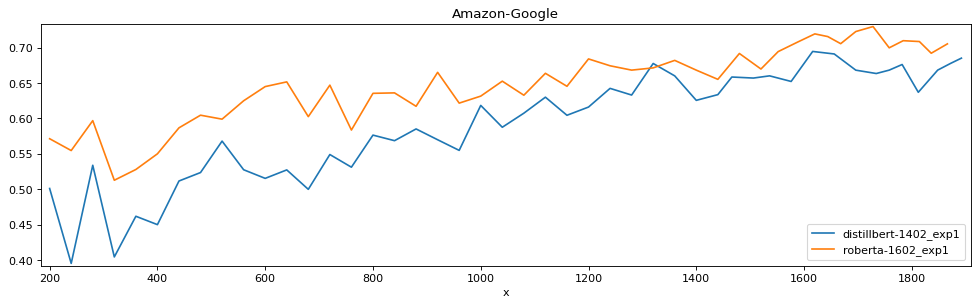

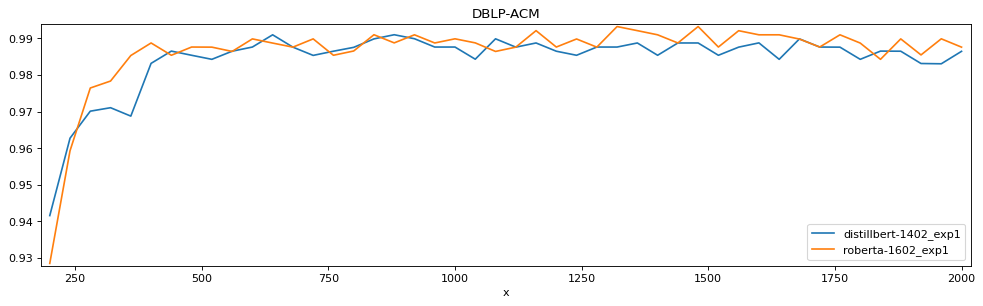

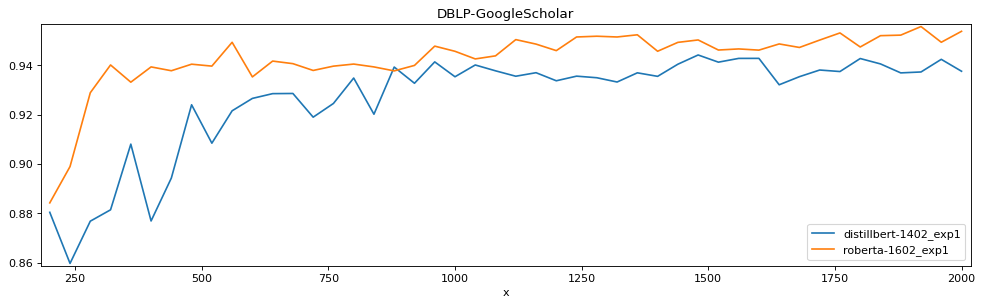

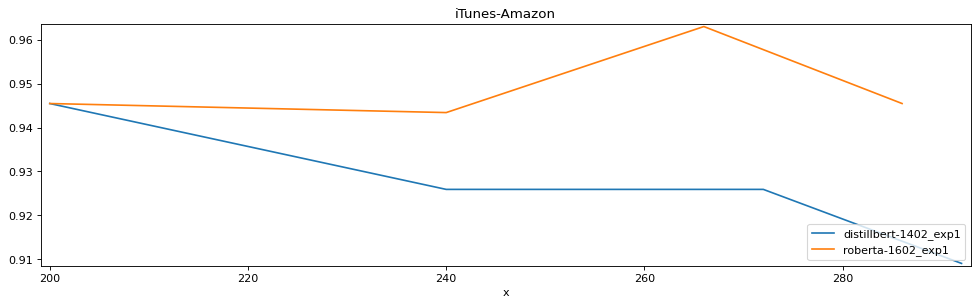

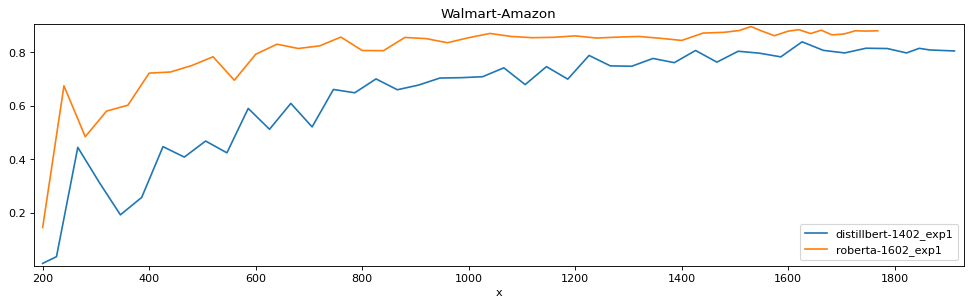

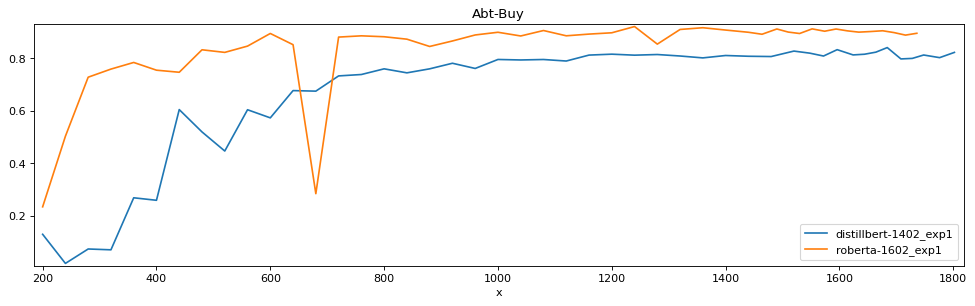

In [73]:
# plots=['dl_ml', 'dl_random', 'dl_al_ml']
save_plots(models=['distillbert-1402', 'roberta-1602'], y='test_f1', plots=['exp1'])

File exists
File exists
File exists
File exists
File exists
File exists


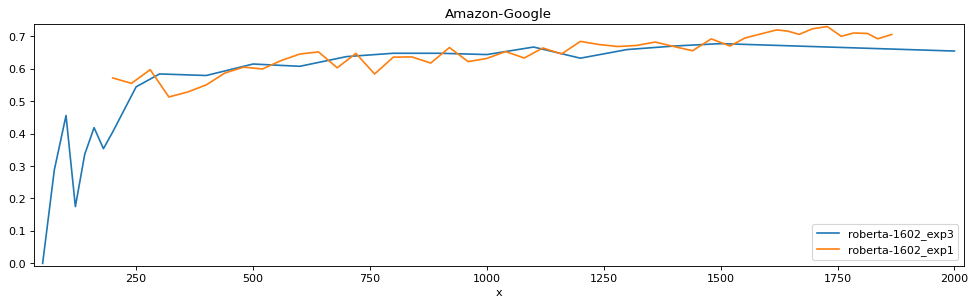

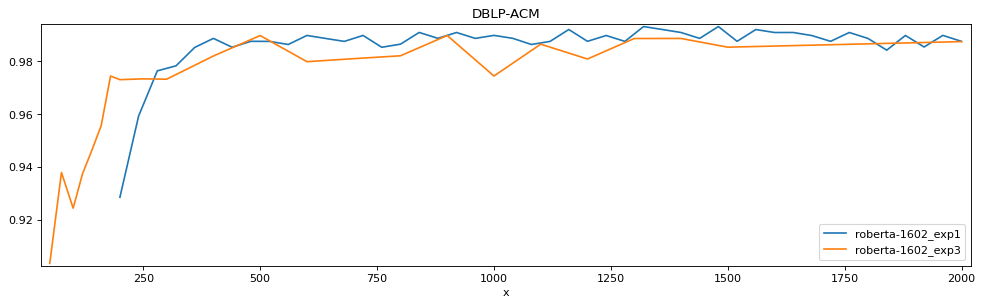

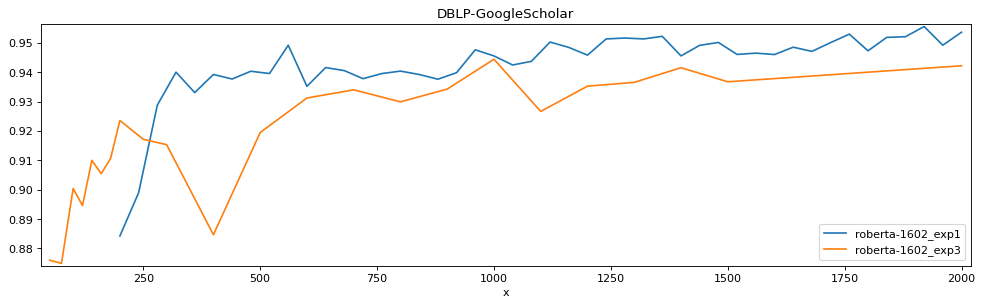

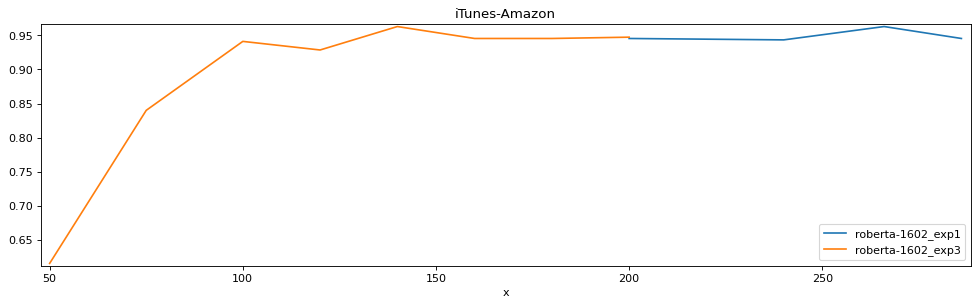

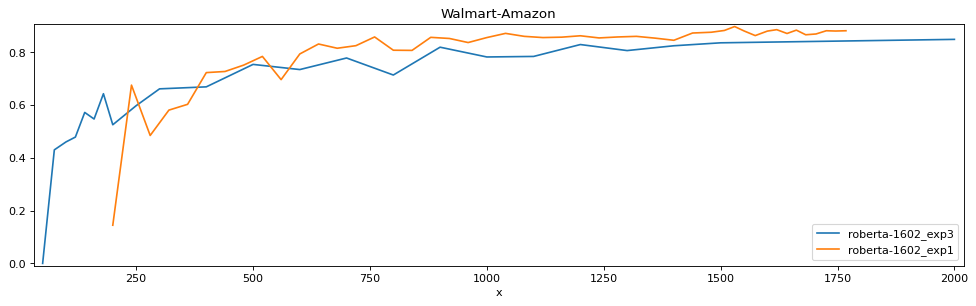

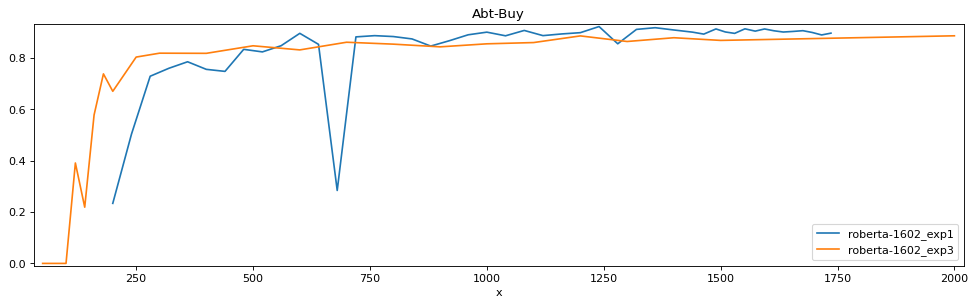

In [74]:
save_plots(models=['roberta-1602'], y='test_f1', plots=['exp1', 'exp3'])